In [1]:
from libs import *
from matplotlib import get_backend

In [2]:
projection = ["Train No","Station Code","Arrival time","Departure Time"]
trains=['16316','16332','12778','16525','12258']
stations = {"KCVL":0,"QLN":57.5, "KYJ": 98.4,"ALLP": 141.6, "ERS" : 198.8, "TCR" : 272.8}

In [3]:
class configPlot:
    def __init__(self,legend,title,xlabel="",ylabel="station"):
        self.legend = legend
        self.xlabel = xlabel
        self.ylabel = ylabel
        self.title = title.upper()
    def __call__(self,f):
        def ff():
            plt.rcParams['figure.figsize'] = [30, 20]
            f()
            plt.title(self.title, fontsize=20, fontweight='bold')
            leg = plt.legend(self.legend,prop={'size': 40})
            leg_lines = leg.get_lines()
            plt.setp(leg_lines, linewidth=20)
            plt.xticks(rotation=90)
            plt.ylabel(self.ylabel)
            plt.xlabel(self.xlabel)

        return ff
    
def toMinutes(pdColumn):
    pdIndex = pd.DatetimeIndex(pd.to_datetime(pdColumn, format='%H:%M:%S',errors="ignore"))
    return pdIndex.hour * 60 + pdIndex.minute


def getdata(projection=None):
    data = pd.read_csv("./data/Train_details_22122017.csv",low_memory=False)
    data = data[data["Arrival time"].str.match(r'\d\d:\d\d:\d\d') == True]
    if projection is not None:
        data = data[projection]
    data["Departure Time"] = toMinutes(data["Departure Time"])
    data["Arrival time"] = toMinutes(data["Arrival time"])
    data.set_index('Arrival time') 
    return data


def plotStations(trains):
    keys = list(map(lambda x:str(x)[11:16],schedules['16316'].resample('1T').pad(None).index.values))
    fig, ax = plt.subplots()
    fig.canvas.draw()
    x = 0
    for key in trains:
        x = x + len(schedules[key])
        pl(key)
    

def getSchedules(stations,trains):
    schedule = data[data["Station Code"].isin(stations)]
    schedule = schedule[schedule["Train No"].isin(trains)]
    gb = schedule.groupby("Train No")
    return {x : gb.get_group(x)[['Station Code','Arrival time']].set_index('Arrival time') for x in gb.groups}

def getStations():
    return  stations.keys()

In [4]:
data = getdata()

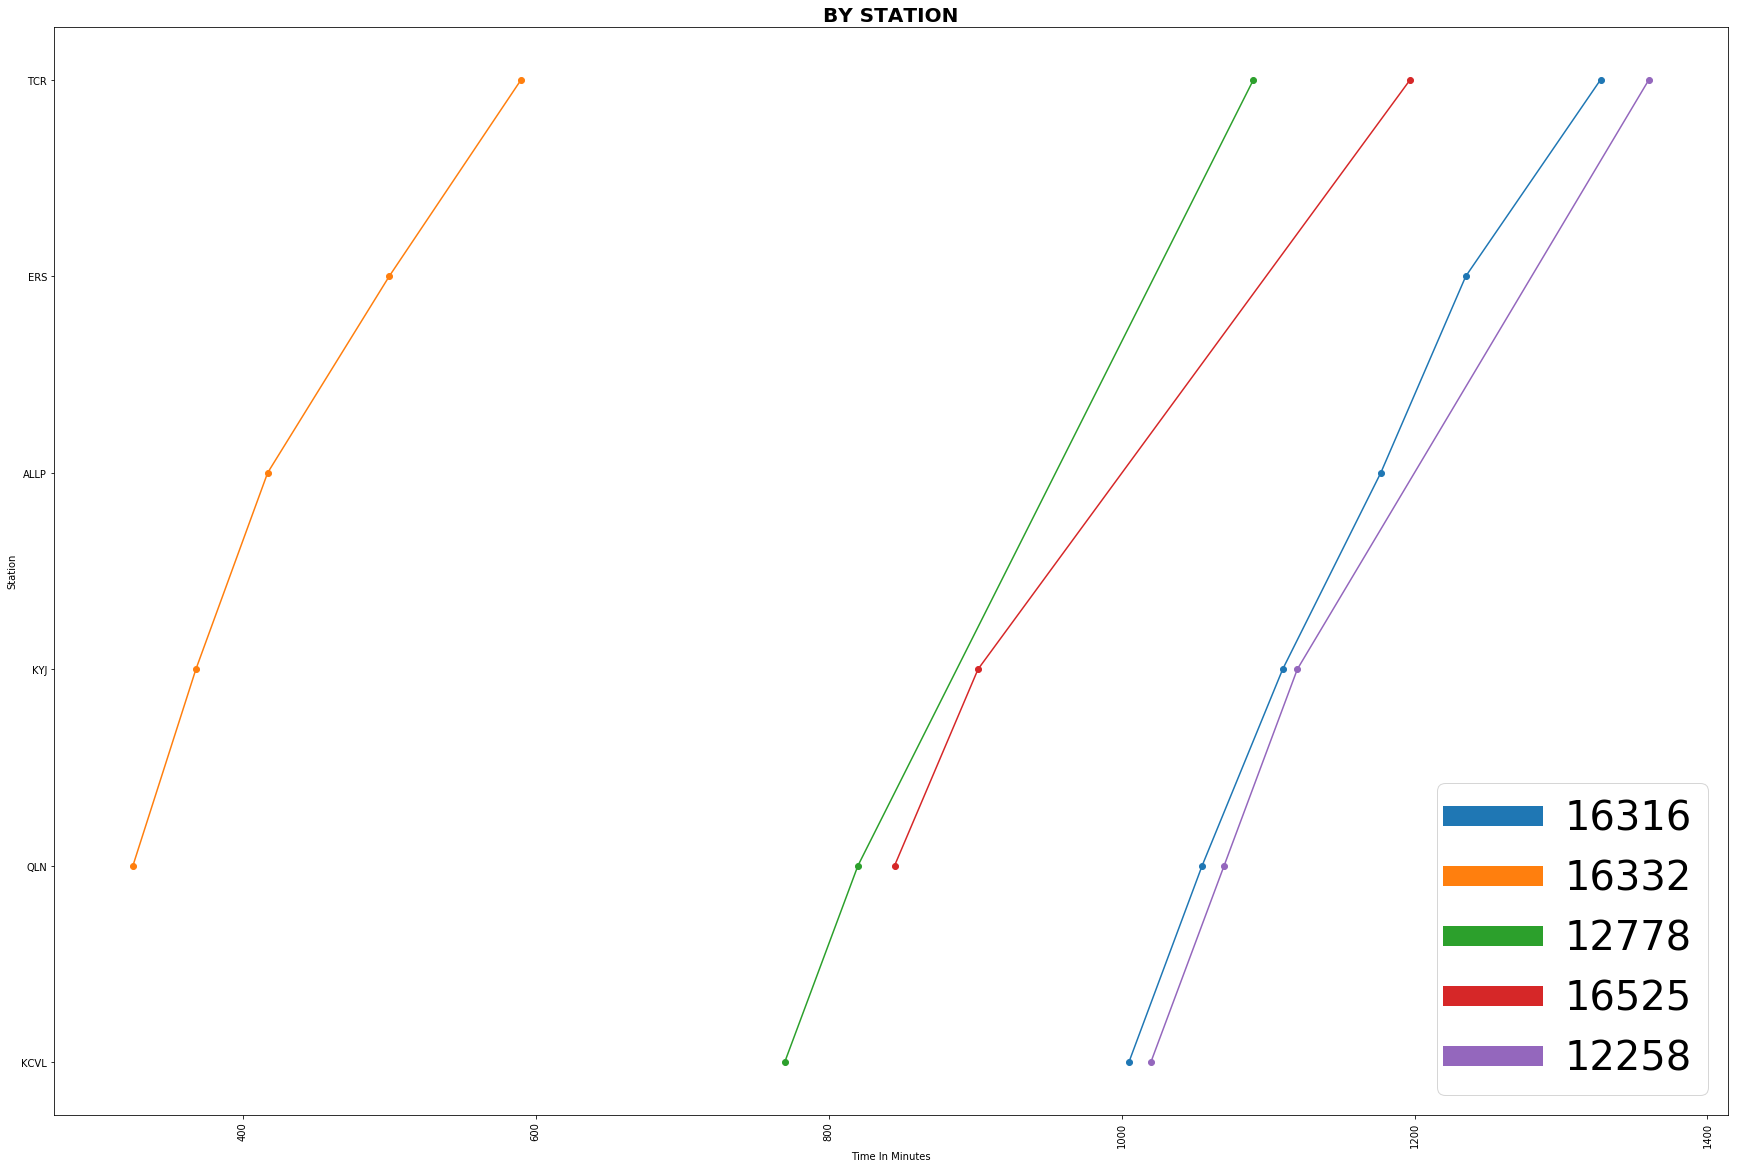

In [5]:
@configPlot(trains,"By Station", 'Time In Minutes','Station')
def plotAsStations():
    plt.close()
    schedules = getSchedules(getStations(),trains)
    for train in trains:
        keys = schedules[train].index.values
        values = schedules[train]["Station Code"].values
        plt.plot(keys,values)
        plt.scatter(keys,values)


plotAsStations()

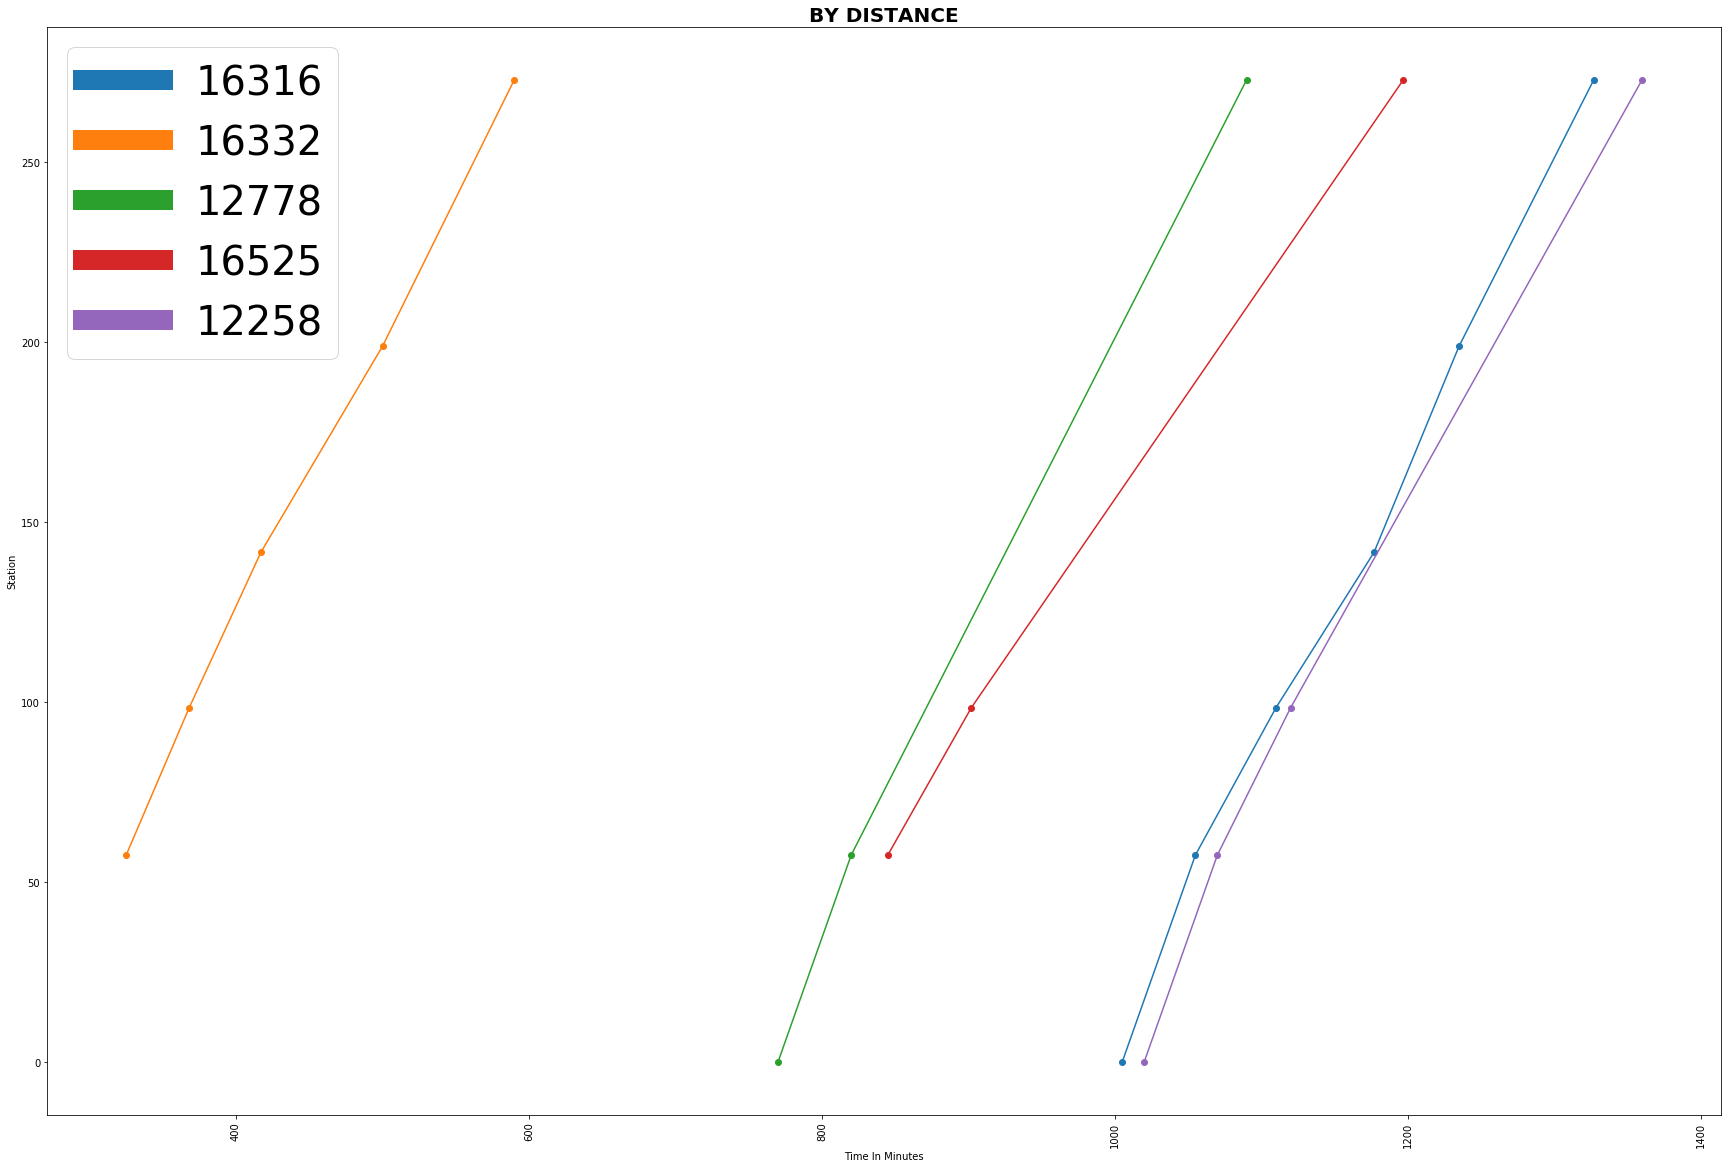

In [6]:
@configPlot(trains,"By Distance",'Time In Minutes','Station')
def plotAsStations():
    plt.close()
    schedules = getSchedules(getStations(),trains)
    for train in trains:
        keys = schedules[train].index.values
        values = list(map(lambda x: stations[x],schedules[train]["Station Code"].values))
        plt.plot(keys,values)
        plt.scatter(keys,values)

    
plotAsStations()